For evaluation purpose use eval_agent.py script. \
It will run your agent on the test environment **GridEnvDeform**.

wrap any model and make sure the following methods are implemented:\
for **POMDP** agent
- `get_action(belief,pos)` : returns the action to take given the current state
- `update_belief(self, belief, pos, observation)` : updates the belief given the current state and action

for **MDP** agent
- `get_action(pos)` : returns the action to take given the current state

**Note**: Evaluation is always performed on the **GriEnvDeform** environment. s, _ = env.reset() gives back s = ((x,y,phi),theta)


Models recap:

**MDP**
- TabularQ --------------- **OK**
- DQN -------------------- **OK**
- DQNsb3 
- PPO

**POMDP**
- TabularQ --------------- 
- DQN -------------------- 
- DQNsb3 
- PPO


quindi faccio partire mydqn pomdp e sb3dqn-mdp

In [1]:
import numpy as np
import torch
import itertools
import matplotlib.pyplot as plt

from agents.DQN_agent import DoubleDQNAgent
from environment.env import GridEnvDeform
from eval.eval import eval_agent, all_data

In [2]:
# maze size
N = 2

# thetas deformations (range(a,b),range(c,d))
l0 = 1
h0 = 10
l1 = 1
h1 = 10

maze = np.load(f"maze/maze_{N}.npy")
env = GridEnvDeform(maze,l0,h0,l1,h1)

states = [((x,y,phi),(i,j)) for x in range(1,env.max_shape[0]-1) for y in range(1,env.max_shape[1]-1) for phi in range(4) for i in range(l0,h0) for j in range(l1,h1)] 
positions = [(x,y,phi) for x in range(1,env.max_shape[0]-1) for y in range(1,env.max_shape[1]-1) for phi in range(4)]
actions = [0,1,2,3]
obs = list(itertools.product([0,1], repeat=5))
thetas = [(i,j) for i in range(l0,h0) for j in range(l1,h1)]

state_dict = {state: i for i, state in enumerate(states)}
position_dict = {position: i for i, position in enumerate(positions)}
obs_dict = {obs : i for i, obs in enumerate(obs)}

# Actions are: 0-listen, 1-open-left, 2-open-right
lenS = len(states)
lenP = len(positions)
lenA = len(actions)
lenO = len(obs)

lenS

236196

# Information Directed Sampling IDS

In [ ]:
from src.agents.Infotaxis_agent import IDS, ThetaInfotaxis

agent = IDS(env)
#agent = ThetaInfotaxis(env)

In [13]:
transitions, beliefs = eval_agent("POMDP",agent,env, num_episodes=5,max_episode_steps=30, render=False)

100%|██████████| 5/5 [04:13<00:00, 50.75s/it]


Completed episodes: 0, out of 5


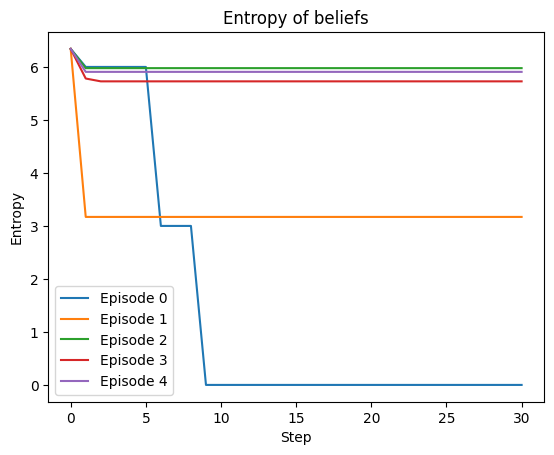

In [14]:
all_data(transitions, beliefs, path="plots/IDS")

In [75]:
import time

# transitions[i] = [(s,a,s',o)....()...] for i-th episode

# replay buffer for episode i = succession of states
episode = 4
replay_episode = [t[0] for t in transitions[episode]] 


env.set_rendering()

for i, s in enumerate(replay_episode):
    env.set_state(s)
    env.render_bis()
    time.sleep(0.5)
    
env.close_render()

error: display Surface quit

# MDP based Solutions

## QMDP tabular

In [4]:
# import the MDP solution model (tabular q in this case)
Q = np.load(f"agents/pretrained/MDP/tabularQ_maze_2_100k.npy")

In [6]:
transitions, beliefs = eval_agent("MDP",Q ,env, num_episodes=20,max_episode_steps=50,render=True)

State: ((4, 8, 3), (5, 7)), Action: 2
State: ((4, 9, 1), (5, 7)), Action: 0
State: ((4, 10, 1), (5, 7)), Action: 0
State: ((4, 11, 1), (5, 7)), Action: 1
State: ((5, 11, 2), (5, 7)), Action: 3
State: ((5, 12, 1), (5, 7)), Action: 0
State: ((5, 13, 1), (5, 7)), Action: 0
State: ((5, 14, 1), (5, 7)), Action: 1
State: ((6, 14, 2), (5, 7)), Action: 3
State: ((6, 15, 1), (5, 7)), Action: 1
State: ((7, 15, 2), (5, 7)), Action: 0
State: ((8, 15, 2), (5, 7)), Action: 0
State: ((9, 15, 2), (5, 7)), Action: 0
State: ((10, 15, 2), (5, 7)), Action: 0
State: ((11, 15, 2), (5, 7)), Action: 0
State: ((12, 15, 2), (5, 7)), Action: 0
State: ((13, 15, 2), (5, 7)), Action: 0
State: ((14, 15, 2), (5, 7)), Action: 0
State: ((15, 15, 2), (5, 7)), Action: 0
State: ((16, 15, 2), (5, 7)), Action: 0
State: ((17, 15, 2), (5, 7)), Action: 0
State: ((18, 15, 2), (5, 7)), Action: 0
State: ((19, 15, 2), (5, 7)), Action: 0
State: ((20, 15, 2), (5, 7)), Action: 0
State: ((19, 22, 1), (7, 3)), Action: 1
State: ((20, 22

In [10]:
from agents.Tabular_Q_agent import Q_agent, Thompson_agent
    
qagent = Q_agent(Q,env)
tagent = Thompson_agent(Q,env)


In [11]:
transitions, beliefs = eval_agent("POMDP",tagent ,env, num_episodes=20,max_episode_steps=50,render=True)

POMDP


  0%|          | 0/20 [00:00<?, ?it/s]

State ((24, 15, 1), (9, 9))
Action:  1
Reward:     -0.5  
Next State:  ((25, 15, 2), (9, 9))
argmax and max Belief:  (6, 9) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((25, 15, 2), (9, 9))
Action:  3
Reward:     -1.0  
Next State:  ((25, 16, 1), (9, 9))
argmax and max Belief:  (6, 9) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((25, 16, 1), (9, 9))
Action:  1
Reward:     -1.5  
Next State:  ((26, 16, 2), (9, 9))
argmax and max Belief:  (6, 9) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((26, 16, 2), (9, 9))
Action:  0
Reward:     -2.0  
Next State:  ((27, 16, 2), (9, 9))
argmax and max Belief:  (6, 9) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((27, 16, 2), (9, 9))
Action:  3
Reward:     -2.5  
Next State:  ((27, 17, 1), (9, 9))
argmax and max Belief:  (6, 9) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((27, 17, 1), (9, 9))
Action:  0
Reward:     -3.0  
Next State:  ((27, 18, 1), (9, 9))
argmax and max Belief:  (7, 9) tensor(0.33

  5%|▌         | 1/20 [00:00<00:07,  2.64it/s]

State ((2, 22, 1), (7, 6))
Action:  0
Reward:     -2.0  
Next State:  ((2, 23, 1), (7, 6))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((2, 23, 1), (7, 6))
Action:  0
Reward:     -4.0  
Next State:  ((2, 24, 1), (7, 6))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((2, 24, 1), (7, 6))
Action:  3
Reward:     -6.0  
Next State:  ((1, 24, 0), (7, 6))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((1, 24, 0), (7, 6))
Action:  3
Reward:     -8.0  
Next State:  ((1, 23, 3), (7, 6))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((1, 23, 3), (7, 6))
Action:  0
Reward:     -10.0  
Next State:  ((1, 22, 3), (7, 6))
argmax and max Belief:  (7, 1) tensor(0.1111)
Belief entropy:  tensor(2.1972)


State ((1, 22, 3), (7, 6))
Action:  0
Reward:     -10.5  
Next State:  ((1, 21, 3), (7, 6))
argmax and max Belief:  (7, 1) tensor(0.1111)
Belief

 10%|█         | 2/20 [00:00<00:08,  2.11it/s]

State ((15, 21, 2), (7, 6))
Action:  0
Reward:     -18.0  
Next State:  ((16, 21, 2), (7, 6))
argmax and max Belief:  (7, 6) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((16, 21, 2), (7, 6))
Action:  0
Reward:     -18.5  
Next State:  ((17, 21, 2), (7, 6))
argmax and max Belief:  (7, 6) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((17, 21, 2), (7, 6))
Action:  0
Reward:     -17.5  
Next State:  ((18, 21, 2), (7, 6))
argmax and max Belief:  (7, 6) tensor(1.)
Belief entropy:  tensor(-0.)


State ((1, 10, 0), (1, 3))
Action:  3
Reward:     -2.0  
Next State:  ((1, 9, 3), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)


State ((1, 9, 3), (1, 3))
Action:  0
Reward:     -4.0  
Next State:  ((1, 8, 3), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy:  tensor(3.5835)


State ((1, 8, 3), (1, 3))
Action:  2
Reward:     -6.0  
Next State:  ((1, 9, 1), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entr

 15%|█▌        | 3/20 [00:01<00:07,  2.28it/s]

State ((7, 3, 2), (1, 3))
Action:  0
Reward:     -21.5  
Next State:  ((8, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((8, 3, 2), (1, 3))
Action:  0
Reward:     -20.5  
Next State:  ((9, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((2, 8, 3), (3, 7))
Action:  0
Reward:     -0.5  
Next State:  ((2, 7, 3), (3, 7))
argmax and max Belief:  (3, 2) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((2, 7, 3), (3, 7))
Action:  3
Reward:     -1.0  
Next State:  ((3, 7, 2), (3, 7))
argmax and max Belief:  (3, 2) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((3, 7, 2), (3, 7))
Action:  0
Reward:     -1.5  
Next State:  ((4, 7, 2), (3, 7))
argmax and max Belief:  (3, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((4, 7, 2), (3, 7))
Action:  0
Reward:     -2.0  
Next State:  ((5, 7, 2), (3, 7))
argmax and max Belief:  (3, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


 20%|██        | 4/20 [00:01<00:07,  2.17it/s]

State ((16, 9, 2), (3, 7))
Action:  0
Reward:     -9.0  
Next State:  ((17, 9, 2), (3, 7))
argmax and max Belief:  (3, 6) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((17, 9, 2), (3, 7))
Action:  0
Reward:     -9.5  
Next State:  ((18, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((18, 9, 2), (3, 7))
Action:  0
Reward:     -10.0  
Next State:  ((19, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((19, 9, 2), (3, 7))
Action:  0
Reward:     -10.5  
Next State:  ((20, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((20, 9, 2), (3, 7))
Action:  0
Reward:     -9.5  
Next State:  ((21, 9, 2), (3, 7))
argmax and max Belief:  (3, 7) tensor(1.)
Belief entropy:  tensor(-0.)


State ((23, 2, 3), (4, 5))
Action:  3
Reward:     -2.0  
Next State:  ((24, 2, 2), (4, 5))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entrop

 25%|██▌       | 5/20 [00:02<00:08,  1.75it/s]

State ((15, 10, 1), (4, 5))
Action:  0
Reward:     -48.5  
Next State:  ((15, 11, 1), (4, 5))
argmax and max Belief:  (4, 5) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((15, 11, 1), (4, 5))
Action:  0
Reward:     -47.5  
Next State:  ((15, 12, 1), (4, 5))
argmax and max Belief:  (4, 5) tensor(1.)
Belief entropy:  tensor(-0.)


State ((14, 26, 2), (6, 1))
Action:  2
Reward:     -2.0  
Next State:  ((13, 26, 0), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((13, 26, 0), (6, 1))
Action:  1
Reward:     -4.0  
Next State:  ((13, 27, 1), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((13, 27, 1), (6, 1))
Action:  1
Reward:     -6.0  
Next State:  ((14, 27, 2), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0133)
Belief entropy:  tensor(4.3175)


State ((14, 27, 2), (6, 1))
Action:  2
Reward:     -8.0  
Next State:  ((13, 27, 0), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0133)
B

 30%|███       | 6/20 [00:03<00:10,  1.30it/s]

State ((3, 26, 0), (6, 1))
Action:  2
Reward:     -100.0  
Next State:  ((4, 26, 2), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0179)
Belief entropy:  tensor(4.0254)


State ((16, 22, 2), (4, 3))
Action:  1
Reward:     -2.0  
Next State:  ((16, 21, 3), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((16, 21, 3), (4, 3))
Action:  2
Reward:     -4.0  
Next State:  ((16, 22, 1), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((16, 22, 1), (4, 3))
Action:  2
Reward:     -6.0  
Next State:  ((16, 21, 3), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((16, 21, 3), (4, 3))
Action:  3
Reward:     -8.0  
Next State:  ((17, 21, 2), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((17, 21, 2), (4, 3))
Action:  1
Reward:     -10.0  
Next State:  ((17, 20, 3), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0

 35%|███▌      | 7/20 [00:04<00:09,  1.35it/s]

State ((11, 13, 0), (4, 3))
Action:  3
Reward:     -54.0  
Next State:  ((11, 12, 3), (4, 3))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)


State ((11, 12, 3), (4, 3))
Action:  1
Reward:     -56.0  
Next State:  ((10, 12, 0), (4, 3))
argmax and max Belief:  (4, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((10, 12, 0), (4, 3))
Action:  0
Reward:     -55.0  
Next State:  ((9, 12, 0), (4, 3))
argmax and max Belief:  (4, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((15, 8, 2), (7, 4))
Action:  0
Reward:     -2.0  
Next State:  ((16, 8, 2), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0182)
Belief entropy:  tensor(4.0073)


State ((16, 8, 2), (7, 4))
Action:  1
Reward:     -4.0  
Next State:  ((16, 7, 3), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0238)
Belief entropy:  tensor(3.7377)


State ((16, 7, 3), (7, 4))
Action:  1
Reward:     -6.0  
Next State:  ((15, 7, 0), (7, 4))
argmax and max Belief:  (1, 1) tensor(0.0238)
Belief entropy

 40%|████      | 8/20 [00:04<00:08,  1.46it/s]

State ((12, 15, 1), (7, 4))
Action:  0
Reward:     -20.0  
Next State:  ((12, 16, 1), (7, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((12, 16, 1), (7, 4))
Action:  0
Reward:     -20.5  
Next State:  ((12, 17, 1), (7, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((12, 17, 1), (7, 4))
Action:  0
Reward:     -21.0  
Next State:  ((12, 18, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 18, 1), (7, 4))
Action:  0
Reward:     -21.5  
Next State:  ((12, 19, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 19, 1), (7, 4))
Action:  0
Reward:     -22.0  
Next State:  ((12, 20, 1), (7, 4))
argmax and max Belief:  (7, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 20, 1), (7, 4))
Action:  0
Reward:     -21.0  
Next State:  ((12, 21, 1), (7, 4))
argmax and max Belief:  (7, 4) tenso

 45%|████▌     | 9/20 [00:05<00:06,  1.63it/s]

State ((23, 12, 2), (4, 8))
Action:  0
Reward:     -20.0  
Next State:  ((24, 12, 2), (4, 8))
argmax and max Belief:  (4, 8) tensor(1.)
Belief entropy:  tensor(-0.)


State ((14, 27, 2), (7, 8))
Action:  0
Reward:     -2.0  
Next State:  ((15, 27, 2), (7, 8))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((15, 27, 2), (7, 8))
Action:  2
Reward:     -4.0  
Next State:  ((14, 27, 0), (7, 8))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((14, 27, 0), (7, 8))
Action:  3
Reward:     -6.0  
Next State:  ((14, 26, 3), (7, 8))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((14, 26, 3), (7, 8))
Action:  0
Reward:     -8.0  
Next State:  ((14, 25, 3), (7, 8))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((14, 25, 3), (7, 8))
Action:  2
Reward:     -10.0  
Next State:  ((14, 26, 1), (7, 8))
argmax and max Belief:  (1, 1) tensor(0.0141)
B

 50%|█████     | 10/20 [00:06<00:06,  1.61it/s]

State ((23, 21, 2), (7, 8))
Action:  0
Reward:     -29.5  
Next State:  ((24, 21, 2), (7, 8))
argmax and max Belief:  (7, 8) tensor(1.)
Belief entropy:  tensor(-0.)


State ((15, 24, 1), (6, 5))
Action:  2
Reward:     -2.0  
Next State:  ((15, 23, 3), (6, 5))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((15, 23, 3), (6, 5))
Action:  3
Reward:     -4.0  
Next State:  ((16, 23, 2), (6, 5))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((16, 23, 2), (6, 5))
Action:  2
Reward:     -6.0  
Next State:  ((15, 23, 0), (6, 5))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((15, 23, 0), (6, 5))
Action:  3
Reward:     -8.0  
Next State:  ((15, 22, 3), (6, 5))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((15, 22, 3), (6, 5))
Action:  0
Reward:     -10.0  
Next State:  ((15, 21, 3), (6, 5))
argmax and max Belief:  (1, 1) tensor(0.0152)
B

 55%|█████▌    | 11/20 [00:06<00:05,  1.74it/s]

State ((12, 18, 3), (6, 5))
Action:  3
Reward:     -33.0  
Next State:  ((13, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((13, 18, 2), (6, 5))
Action:  0
Reward:     -33.5  
Next State:  ((14, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((14, 18, 2), (6, 5))
Action:  0
Reward:     -32.5  
Next State:  ((15, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(1.)
Belief entropy:  tensor(-0.)


State ((18, 7, 1), (2, 1))
Action:  0
Reward:     -2.0  
Next State:  ((18, 8, 1), (2, 1))
argmax and max Belief:  (1, 1) tensor(0.0189)
Belief entropy:  tensor(3.9703)


State ((18, 8, 1), (2, 1))
Action:  2
Reward:     -4.0  
Next State:  ((18, 7, 3), (2, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 7, 3), (2, 1))
Action:  1
Reward:     -6.0  
Next State:  ((17, 7, 0), (2, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief

 60%|██████    | 12/20 [00:07<00:04,  1.71it/s]

State ((4, 5, 0), (2, 1))
Action:  0
Reward:     -48.5  
Next State:  ((3, 5, 0), (2, 1))
argmax and max Belief:  (2, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((3, 5, 0), (2, 1))
Action:  1
Reward:     -47.5  
Next State:  ((3, 6, 1), (2, 1))
argmax and max Belief:  (2, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((27, 20, 3), (6, 9))
Action:  1
Reward:     -2.0  
Next State:  ((26, 20, 0), (6, 9))
argmax and max Belief:  (1, 1) tensor(0.0128)
Belief entropy:  tensor(4.3567)




 65%|██████▌   | 13/20 [00:07<00:03,  2.28it/s]

State ((26, 20, 0), (6, 9))
Action:  2
Reward:     -4.0  
Next State:  ((27, 20, 2), (6, 9))
argmax and max Belief:  (1, 1) tensor(0.0128)
Belief entropy:  tensor(4.3567)


State ((27, 20, 2), (6, 9))
Action:  1
Reward:     -6.0  
Next State:  ((27, 19, 3), (6, 9))
argmax and max Belief:  (6, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((27, 19, 3), (6, 9))
Action:  0
Reward:     -5.0  
Next State:  ((27, 18, 3), (6, 9))
argmax and max Belief:  (6, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((11, 10, 2), (6, 1))
Action:  0
Reward:     -2.0  
Next State:  ((12, 10, 2), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belief entropy:  tensor(3.8712)


State ((12, 10, 2), (6, 1))
Action:  3
Reward:     -4.0  
Next State:  ((12, 11, 1), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belief entropy:  tensor(3.8712)


State ((12, 11, 1), (6, 1))
Action:  3
Reward:     -6.0  
Next State:  ((11, 11, 0), (6, 1))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belief ent

 70%|███████   | 14/20 [00:07<00:03,  1.94it/s]

State ((3, 17, 1), (6, 1))
Action:  0
Reward:     -39.0  
Next State:  ((3, 18, 1), (6, 1))
argmax and max Belief:  (6, 1) tensor(1.)
Belief entropy:  tensor(-0.)


State ((8, 26, 2), (8, 9))
Action:  3
Reward:     -2.0  
Next State:  ((8, 27, 1), (8, 9))
argmax and max Belief:  (1, 1) tensor(0.0135)
Belief entropy:  tensor(4.3041)


State ((8, 27, 1), (8, 9))
Action:  2
Reward:     -4.0  
Next State:  ((8, 26, 3), (8, 9))
argmax and max Belief:  (1, 1) tensor(0.0135)
Belief entropy:  tensor(4.3041)


State ((8, 26, 3), (8, 9))
Action:  1
Reward:     -6.0  
Next State:  ((7, 26, 0), (8, 9))
argmax and max Belief:  (1, 1) tensor(0.0137)
Belief entropy:  tensor(4.2905)


State ((7, 26, 0), (8, 9))
Action:  3
Reward:     -8.0  
Next State:  ((7, 25, 3), (8, 9))
argmax and max Belief:  (8, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((7, 25, 3), (8, 9))
Action:  0
Reward:     -8.5  
Next State:  ((7, 24, 3), (8, 9))
argmax and max Belief:  (8, 3) tensor(0.1429)
Belief entropy

 75%|███████▌  | 15/20 [00:08<00:02,  1.85it/s]

State ((23, 24, 2), (8, 9))
Action:  0
Reward:     -17.0  
Next State:  ((24, 24, 2), (8, 9))
argmax and max Belief:  (8, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 24, 2), (8, 9))
Action:  0
Reward:     -17.5  
Next State:  ((25, 24, 2), (8, 9))
argmax and max Belief:  (8, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((25, 24, 2), (8, 9))
Action:  0
Reward:     -18.0  
Next State:  ((26, 24, 2), (8, 9))
argmax and max Belief:  (8, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((26, 24, 2), (8, 9))
Action:  0
Reward:     -17.0  
Next State:  ((27, 24, 2), (8, 9))
argmax and max Belief:  (8, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((5, 20, 3), (6, 5))
Action:  0
Reward:     -2.0  
Next State:  ((5, 19, 3), (6, 5))
argmax and max Belief:  (6, 2) tensor(0.1250)
Belief entropy:  tensor(2.0794)


State ((5, 19, 3), (6, 5))
Action:  0
Reward:     -2.5  
Next State:  ((5, 18, 3), (6, 5))
argmax and max Belief:  (6, 2) tensor(0.1250)
Belief entropy:  tensor(

 80%|████████  | 16/20 [00:08<00:01,  2.16it/s]

State ((12, 18, 2), (6, 5))
Action:  0
Reward:     -6.5  
Next State:  ((13, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((13, 18, 2), (6, 5))
Action:  0
Reward:     -7.0  
Next State:  ((14, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((14, 18, 2), (6, 5))
Action:  0
Reward:     -6.0  
Next State:  ((15, 18, 2), (6, 5))
argmax and max Belief:  (6, 5) tensor(1.)
Belief entropy:  tensor(-0.)


State ((13, 1, 2), (6, 3))
Action:  3
Reward:     -2.0  
Next State:  ((13, 2, 1), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0370)
Belief entropy:  tensor(3.2958)


State ((13, 2, 1), (6, 3))
Action:  3
Reward:     -4.0  
Next State:  ((12, 2, 0), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0370)
Belief entropy:  tensor(3.2958)


State ((12, 2, 0), (6, 3))
Action:  0
Reward:     -6.0  
Next State:  ((11, 2, 0), (6, 3))
argmax and max Belief:  (1, 1) tensor(0.0370)
Belief en

 85%|████████▌ | 17/20 [00:09<00:01,  2.13it/s]

State ((9, 17, 1), (6, 3))
Action:  0
Reward:     -15.0  
Next State:  ((9, 18, 1), (6, 3))
argmax and max Belief:  (6, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((8, 21, 1), (7, 9))
Action:  3
Reward:     -0.5  
Next State:  ((7, 21, 0), (7, 9))
argmax and max Belief:  (7, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((7, 21, 0), (7, 9))
Action:  2
Reward:     -1.0  
Next State:  ((8, 21, 2), (7, 9))
argmax and max Belief:  (7, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((8, 21, 2), (7, 9))
Action:  0
Reward:     -1.5  
Next State:  ((9, 21, 2), (7, 9))
argmax and max Belief:  (7, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((9, 21, 2), (7, 9))
Action:  0
Reward:     -2.0  
Next State:  ((10, 21, 2), (7, 9))
argmax and max Belief:  (7, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((10, 21, 2), (7, 9))
Action:  0
Reward:     -2.5  
Next State:  ((11, 21, 2), (7, 9))
argmax and max Belief:  (7, 4) tensor(0.1667)
Belief entr

 90%|█████████ | 18/20 [00:09<00:00,  2.11it/s]

State ((23, 21, 2), (7, 9))
Action:  0
Reward:     -9.0  
Next State:  ((24, 21, 2), (7, 9))
argmax and max Belief:  (7, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 21, 2), (7, 9))
Action:  0
Reward:     -9.5  
Next State:  ((25, 21, 2), (7, 9))
argmax and max Belief:  (7, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((25, 21, 2), (7, 9))
Action:  0
Reward:     -10.0  
Next State:  ((26, 21, 2), (7, 9))
argmax and max Belief:  (7, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((26, 21, 2), (7, 9))
Action:  0
Reward:     -9.0  
Next State:  ((27, 21, 2), (7, 9))
argmax and max Belief:  (7, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((1, 13, 0), (3, 3))
Action:  3
Reward:     -2.0  
Next State:  ((1, 12, 3), (3, 3))
argmax and max Belief:  (1, 1) tensor(0.0159)
Belief entropy:  tensor(4.1431)


State ((1, 12, 3), (3, 3))
Action:  3
Reward:     -4.0  
Next State:  ((2, 12, 2), (3, 3))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief entropy:  tensor(3.9

 95%|█████████▌| 19/20 [00:10<00:00,  2.26it/s]

State ((8, 8, 2), (3, 3))
Action:  0
Reward:     -13.5  
Next State:  ((9, 8, 2), (3, 3))
argmax and max Belief:  (3, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((9, 8, 2), (3, 3))
Action:  3
Reward:     -12.5  
Next State:  ((9, 9, 1), (3, 3))
argmax and max Belief:  (3, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((7, 19, 0), (9, 9))
Action:  0
Reward:     -0.5  
Next State:  ((6, 19, 0), (9, 9))
argmax and max Belief:  (9, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((6, 19, 0), (9, 9))
Action:  1
Reward:     -1.0  
Next State:  ((6, 20, 1), (9, 9))
argmax and max Belief:  (9, 3) tensor(0.1429)
Belief entropy:  tensor(1.9459)


State ((6, 20, 1), (9, 9))
Action:  2
Reward:     -1.5  
Next State:  ((6, 19, 3), (9, 9))
argmax and max Belief:  (9, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((6, 19, 3), (9, 9))
Action:  2
Reward:     -2.0  
Next State:  ((6, 20, 1), (9, 9))
argmax and max Belief:  (9, 4) tensor(0.1667)
Belief entropy:  tensor(

100%|██████████| 20/20 [00:11<00:00,  1.80it/s]

State ((22, 27, 2), (9, 9))
Action:  0
Reward:     -17.0  
Next State:  ((23, 27, 2), (9, 9))
argmax and max Belief:  (9, 8) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((23, 27, 2), (9, 9))
Action:  0
Reward:     -17.5  
Next State:  ((24, 27, 2), (9, 9))
argmax and max Belief:  (9, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((24, 27, 2), (9, 9))
Action:  0
Reward:     -18.0  
Next State:  ((25, 27, 2), (9, 9))
argmax and max Belief:  (9, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((25, 27, 2), (9, 9))
Action:  0
Reward:     -18.5  
Next State:  ((26, 27, 2), (9, 9))
argmax and max Belief:  (9, 9) tensor(1.)
Belief entropy:  tensor(-0.)


State ((26, 27, 2), (9, 9))
Action:  0
Reward:     -17.5  
Next State:  ((27, 27, 2), (9, 9))
argmax and max Belief:  (9, 9) tensor(1.)
Belief entropy:  tensor(-0.)




In [6]:
env.save_gif()

GIF saved as gif


Completed episodes: 15, out of 20


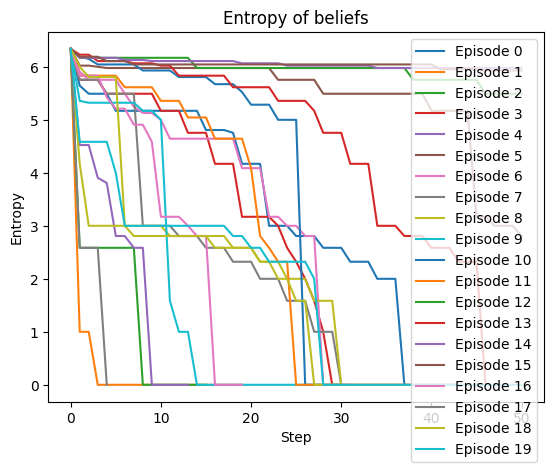

In [13]:
all_data(transitions, beliefs, path="plots/Thompson")

In [24]:
env.set_rendering()
while True:
    try:
        env.render_bis()
    except:
        break

## DQN 

In [70]:

agent = DoubleDQNAgent(5, 4, lr = 0.01, batch_size=64,target_update_freq=100, wandb=False)
agent.load("agents/pretrained/MDP/double_dqn_45000.pt")

In [ ]:
eval_agent("MDP",agent,env, num_episodes=20,max_episode_steps=100,render=True)

In [ ]:
# QMDP
eval_agent("POMDP",agent,env, num_episodes=20,max_episode_steps=100,render=True)

In [73]:
class DeepThompson_agent():
    def __init__(self, Q,env):
        self.Q = Q
        self.env = env

    def get_entropy(self, belief):
        return -torch.sum(belief * torch.log(belief + 1e-10))

    def get_action(self, belief,pos):
        theta = self.env.deformations[torch.multinomial(belief, 1).item()]

        s = (pos[0],pos[1],pos[2],theta[0],theta[1])

        # Agent takes an action using a greedy policy (without exploration)
        action = self.Q.choose_deterministic_action(s)
        return action
    
    def update_belief(self, belief, pos, observation):
        """"
        perform update over theta
        
        $$b'_{x,a,o}(theta) = \eta \cdot p(o|x,theta) \cdot b(theta)$$
        
        """

        new_belief = torch.zeros_like(belief)

        for t, theta in enumerate(self.env.deformations):
            P_o_s_theta = np.all(self.env.get_observation(s = (pos,theta)) == observation) # 0 or 1 

            new_belief[t] = P_o_s_theta * belief[t]
        
        new_belief = new_belief / (torch.sum(new_belief) + 1e-10)

        return new_belief


In [74]:
pomdp_agent = DeepThompson_agent(agent,env)

In [75]:
# thompson sampling
eval_agent("POMDP",pomdp_agent,env, num_episodes=10,max_episode_steps=50,render=True)

POMDP
eval_agent_pomdp


  0%|          | 0/10 [00:00<?, ?it/s]

State ((14, 20, 1), (3, 4))
Action:  2
Reward:     -2.0  
Next State:  ((14, 19, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((14, 19, 3), (3, 4))
Action:  0
Reward:     -4.0  
Next State:  ((14, 18, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((14, 18, 3), (3, 4))
Action:  0
Reward:     -6.0  
Next State:  ((14, 17, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((14, 17, 3), (3, 4))
Action:  1
Reward:     -8.0  
Next State:  ((13, 17, 0), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0175)
Belief entropy:  tensor(4.0431)


State ((13, 17, 0), (3, 4))
Action:  3
Reward:     -10.0  
Next State:  ((13, 16, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief entropy:  tensor(3.9318)


State ((13, 16, 3), (3, 4))
Action:  0
Reward:     -12.0  
Next State:  ((13, 15, 3), (3, 4))
argmax and max Belief:  (1, 1) tensor(0.

 10%|█         | 1/10 [00:00<00:04,  2.24it/s]

State ((11, 9, 3), (3, 4))
Action:  3
Reward:     -25.5  
Next State:  ((12, 9, 2), (3, 4))
argmax and max Belief:  (3, 4) tensor(1.)
Belief entropy:  tensor(-0.)


State ((6, 15, 3), (7, 3))
Action:  0
Reward:     -2.0  
Next State:  ((6, 14, 3), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((6, 14, 3), (7, 3))
Action:  3
Reward:     -2.5  
Next State:  ((7, 14, 2), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((7, 14, 2), (7, 3))
Action:  0
Reward:     -3.0  
Next State:  ((8, 14, 2), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((8, 14, 2), (7, 3))
Action:  0
Reward:     -3.5  
Next State:  ((9, 14, 2), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 14, 2), (7, 3))
Action:  3
Reward:     -4.0  
Next State:  ((9, 15, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy

 20%|██        | 2/10 [00:00<00:03,  2.67it/s]

State ((9, 16, 1), (7, 3))
Action:  0
Reward:     -5.0  
Next State:  ((9, 17, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 17, 1), (7, 3))
Action:  0
Reward:     -5.5  
Next State:  ((9, 18, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 18, 1), (7, 3))
Action:  0
Reward:     -6.0  
Next State:  ((9, 19, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 19, 1), (7, 3))
Action:  0
Reward:     -6.5  
Next State:  ((9, 20, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 20, 1), (7, 3))
Action:  0
Reward:     -5.5  
Next State:  ((9, 21, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((20, 7, 1), (1, 3))
Action:  3
Reward:     -2.0  
Next State:  ((19, 7, 0), (1, 3))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:

 30%|███       | 3/10 [00:01<00:03,  1.94it/s]

State ((8, 3, 2), (1, 3))
Action:  0
Reward:     -37.0  
Next State:  ((9, 3, 2), (1, 3))
argmax and max Belief:  (1, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((20, 22, 2), (9, 9))
Action:  1
Reward:     -0.5  
Next State:  ((20, 21, 3), (9, 9))
argmax and max Belief:  (7, 7) tensor(0.1111)
Belief entropy:  tensor(2.1972)


State ((20, 21, 3), (9, 9))
Action:  2
Reward:     -1.0  
Next State:  ((20, 22, 1), (9, 9))
argmax and max Belief:  (8, 7) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((20, 22, 1), (9, 9))
Action:  1
Reward:     -1.5  
Next State:  ((21, 22, 2), (9, 9))
argmax and max Belief:  (8, 8) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((21, 22, 2), (9, 9))
Action:  3
Reward:     -2.0  
Next State:  ((21, 23, 1), (9, 9))
argmax and max Belief:  (8, 8) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((21, 23, 1), (9, 9))
Action:  1
Reward:     -2.5  
Next State:  ((22, 23, 2), (9, 9))
argmax and max Belief:  (8, 8) tensor(0.2500)
Belief

 40%|████      | 4/10 [00:01<00:02,  2.11it/s]

State ((16, 19, 0), (6, 4))
Action:  0
Reward:     -2.0  
Next State:  ((15, 19, 0), (6, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((15, 19, 0), (6, 4))
Action:  3
Reward:     -4.0  
Next State:  ((15, 18, 3), (6, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((15, 18, 3), (6, 4))
Action:  1
Reward:     -6.0  
Next State:  ((14, 18, 0), (6, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)




 50%|█████     | 5/10 [00:02<00:01,  2.68it/s]

State ((14, 18, 0), (6, 4))
Action:  3
Reward:     -8.0  
Next State:  ((14, 17, 3), (6, 4))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((14, 17, 3), (6, 4))
Action:  1
Reward:     -10.0  
Next State:  ((13, 17, 0), (6, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((13, 17, 0), (6, 4))
Action:  0
Reward:     -10.5  
Next State:  ((12, 17, 0), (6, 4))
argmax and max Belief:  (6, 4) tensor(0.2500)
Belief entropy:  tensor(1.3863)


State ((12, 17, 0), (6, 4))
Action:  1
Reward:     -9.5  
Next State:  ((12, 18, 1), (6, 4))
argmax and max Belief:  (6, 4) tensor(1.)
Belief entropy:  tensor(-0.)


State ((14, 10, 3), (5, 8))
Action:  1
Reward:     -2.0  
Next State:  ((13, 10, 0), (5, 8))
argmax and max Belief:  (5, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((13, 10, 0), (5, 8))
Action:  1
Reward:     -2.5  
Next State:  ((13, 11, 1), (5, 8))
argmax and max Belief:  (5, 7) tensor(0.3333)
B

 60%|██████    | 6/10 [00:02<00:01,  2.48it/s]

State ((19, 15, 2), (5, 8))
Action:  0
Reward:     -8.0  
Next State:  ((20, 15, 2), (5, 8))
argmax and max Belief:  (5, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((20, 15, 2), (5, 8))
Action:  0
Reward:     -8.5  
Next State:  ((21, 15, 2), (5, 8))
argmax and max Belief:  (5, 8) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((21, 15, 2), (5, 8))
Action:  0
Reward:     -9.0  
Next State:  ((22, 15, 2), (5, 8))
argmax and max Belief:  (5, 8) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((22, 15, 2), (5, 8))
Action:  0
Reward:     -9.5  
Next State:  ((23, 15, 2), (5, 8))
argmax and max Belief:  (5, 8) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((23, 15, 2), (5, 8))
Action:  0
Reward:     -8.5  
Next State:  ((24, 15, 2), (5, 8))
argmax and max Belief:  (5, 8) tensor(1.)
Belief entropy:  tensor(-0.)


State ((14, 9, 1), (5, 2))
Action:  3
Reward:     -2.0  
Next State:  ((13, 9, 0), (5, 2))
argmax and max Belief:  (1, 1) tensor(0.0208)
Belie

 70%|███████   | 7/10 [00:02<00:01,  2.41it/s]

State ((12, 26, 0), (5, 7))
Action:  3
Reward:     -2.0  
Next State:  ((12, 25, 3), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0145)
Belief entropy:  tensor(4.2341)


State ((12, 25, 3), (5, 7))
Action:  1
Reward:     -4.0  
Next State:  ((11, 25, 0), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0145)
Belief entropy:  tensor(4.2341)


State ((11, 25, 0), (5, 7))
Action:  0
Reward:     -6.0  
Next State:  ((10, 25, 0), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0149)
Belief entropy:  tensor(4.2047)


State ((10, 25, 0), (5, 7))
Action:  3
Reward:     -8.0  
Next State:  ((10, 24, 3), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0149)
Belief entropy:  tensor(4.2047)


State ((10, 24, 3), (5, 7))
Action:  0
Reward:     -10.0  
Next State:  ((10, 23, 3), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0149)
Belief entropy:  tensor(4.2047)


State ((10, 23, 3), (5, 7))
Action:  0
Reward:     -12.0  
Next State:  ((10, 22, 3), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.

 80%|████████  | 8/10 [00:03<00:01,  1.85it/s]

State ((18, 15, 2), (5, 7))
Action:  0
Reward:     -31.5  
Next State:  ((19, 15, 2), (5, 7))
argmax and max Belief:  (5, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((19, 15, 2), (5, 7))
Action:  0
Reward:     -32.0  
Next State:  ((20, 15, 2), (5, 7))
argmax and max Belief:  (5, 7) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((20, 15, 2), (5, 7))
Action:  0
Reward:     -31.0  
Next State:  ((21, 15, 2), (5, 7))
argmax and max Belief:  (5, 7) tensor(1.)
Belief entropy:  tensor(-0.)


State ((17, 3, 3), (7, 3))
Action:  1
Reward:     -2.0  
Next State:  ((16, 3, 0), (7, 3))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy:  tensor(3.5835)


State ((16, 3, 0), (7, 3))
Action:  0
Reward:     -4.0  
Next State:  ((15, 3, 0), (7, 3))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief entropy:  tensor(3.5835)


State ((15, 3, 0), (7, 3))
Action:  0
Reward:     -6.0  
Next State:  ((14, 3, 0), (7, 3))
argmax and max Belief:  (1, 1) tensor(0.0278)
Belief

 90%|█████████ | 9/10 [00:04<00:00,  1.60it/s]

State ((9, 20, 1), (7, 3))
Action:  0
Reward:     -22.0  
Next State:  ((9, 21, 1), (7, 3))
argmax and max Belief:  (7, 3) tensor(1.)
Belief entropy:  tensor(-0.)


State ((9, 9, 3), (5, 4))
Action:  0
Reward:     -0.5  
Next State:  ((9, 8, 3), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((9, 8, 3), (5, 4))
Action:  3
Reward:     -1.0  
Next State:  ((10, 8, 2), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((10, 8, 2), (5, 4))
Action:  0
Reward:     -1.5  
Next State:  ((11, 8, 2), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((11, 8, 2), (5, 4))
Action:  0
Reward:     -2.0  
Next State:  ((12, 8, 2), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 8, 2), (5, 4))
Action:  3
Reward:     -2.5  
Next State:  ((12, 9, 1), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  

100%|██████████| 10/10 [00:04<00:00,  2.04it/s]

State ((12, 10, 1), (5, 4))
Action:  0
Reward:     -3.5  
Next State:  ((12, 11, 1), (5, 4))
argmax and max Belief:  (4, 4) tensor(0.3333)
Belief entropy:  tensor(1.0986)


State ((12, 11, 1), (5, 4))
Action:  0
Reward:     -4.0  
Next State:  ((12, 12, 1), (5, 4))
argmax and max Belief:  (5, 4) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((12, 12, 1), (5, 4))
Action:  0
Reward:     -4.5  
Next State:  ((12, 13, 1), (5, 4))
argmax and max Belief:  (5, 4) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((12, 13, 1), (5, 4))
Action:  0
Reward:     -5.0  
Next State:  ((12, 14, 1), (5, 4))
argmax and max Belief:  (5, 4) tensor(0.5000)
Belief entropy:  tensor(0.6931)


State ((12, 14, 1), (5, 4))
Action:  0
Reward:     -4.0  
Next State:  ((12, 15, 1), (5, 4))
argmax and max Belief:  (5, 4) tensor(1.)
Belief entropy:  tensor(-0.)




([[(((14, 20, 1), (3, 4)), 2, -2, ((14, 19, 3), (3, 4)), np.False_),
   (((14, 19, 3), (3, 4)), 0, -2, ((14, 18, 3), (3, 4)), np.False_),
   (((14, 18, 3), (3, 4)), 0, -2, ((14, 17, 3), (3, 4)), np.False_),
   (((14, 17, 3), (3, 4)), 1, -2, ((13, 17, 0), (3, 4)), np.False_),
   (((13, 17, 0), (3, 4)), 3, -2, ((13, 16, 3), (3, 4)), np.False_),
   (((13, 16, 3), (3, 4)), 0, -2, ((13, 15, 3), (3, 4)), np.False_),
   (((13, 15, 3), (3, 4)), 0, -2, ((13, 14, 3), (3, 4)), np.False_),
   (((13, 14, 3), (3, 4)), 0, -2, ((13, 13, 3), (3, 4)), np.False_),
   (((13, 13, 3), (3, 4)), 0, -2, ((13, 12, 3), (3, 4)), np.False_),
   (((13, 12, 3), (3, 4)), 1, -2, ((12, 12, 0), (3, 4)), np.False_),
   (((12, 12, 0), (3, 4)), 3, -2, ((12, 11, 3), (3, 4)), np.False_),
   (((12, 11, 3), (3, 4)), 1, -2, ((11, 11, 0), (3, 4)), np.False_),
   (((11, 11, 0), (3, 4)), 3, -2, ((11, 10, 3), (3, 4)), np.False_),
   (((11, 10, 3), (3, 4)), 0, -0.5, ((11, 9, 3), (3, 4)), np.False_),
   (((11, 9, 3), (3, 4)), 3, 1, (

## DQN sb3

In [3]:
from stable_baselines3 import DQN
from environment.env import MDPGYMGridEnvDeform

env = MDPGYMGridEnvDeform(maze,l0,h0,l1,h1)
model = DQN("MultiInputPolicy",env)
# model.load("agents/pretrained/1kvpnpin/model.zip")
model.load("agents/pretrained/MDP/model.zip")

/home/flaccagora/.miniconda3/envs/rob/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() takes at most 16 arguments (18 given)
  warnings.warn(
/home/flaccagora/.miniconda3/envs/rob/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:167: UserWarning: Could not deserialize object exploration_schedule. Consider using `custom_objects` argument to replace this object.
Exception: code() takes at most 16 arguments (18 given)
  warnings.warn(


In [7]:
from collections import OrderedDict

class MDP_DQNsb3():
    def __init__(self, model):
        self.model = model

    def get_action(self,s):
        print(s)
        s = OrderedDict({
                "x": torch.tensor([s[0][0]]),              # Values from 0 to 10
                "y": torch.tensor([s[0][1]]),              # Values from 0 to 10
                "phi": torch.tensor([s[0][2]]),             # Values from 0 to 4
                "theta": torch.tensor(s[1]) ,                                
            })
        print(s)
        # Agent takes an action using a greedy policy (without exploration)
        action = self.model.predict(s,deterministic=True)[0]
        return action
    
mdpmodel = MDP_DQNsb3(model)

In [31]:
s, _ = env.reset()
env.step(0,execute=True)

(((1, 3, 3), (5, 3)), -0.5, np.False_, False, {})

In [10]:
eval_agent("MDP",mdpmodel,env, num_episodes=1,max_episode_steps=100,render=True)

  0%|          | 0/1 [00:00<?, ?it/s]

((1, 15, 0), (4, 8))
OrderedDict([('x', tensor([1])), ('y', tensor([15])), ('phi', tensor([0])), ('theta', tensor([4, 8]))])
State ((1, 15, 0), (4, 8))
Action:  [3]
Reward:     -2.0  
Next State:  ((1, 14, array([3])), (4, 8))


((1, 14, array([3])), (4, 8))
OrderedDict([('x', tensor([1])), ('y', tensor([14])), ('phi', tensor([[3]])), ('theta', tensor([4, 8]))])
State ((1, 14, array([3])), (4, 8))
Action:  [3]
Reward:     -4.0  
Next State:  ((2, 14, array([2])), (4, 8))


((2, 14, array([2])), (4, 8))
OrderedDict([('x', tensor([2])), ('y', tensor([14])), ('phi', tensor([[2]])), ('theta', tensor([4, 8]))])
State ((2, 14, array([2])), (4, 8))
Action:  [3]
Reward:     -6.0  
Next State:  ((2, 15, array([1])), (4, 8))


((2, 15, array([1])), (4, 8))
OrderedDict([('x', tensor([2])), ('y', tensor([15])), ('phi', tensor([[1]])), ('theta', tensor([4, 8]))])
State ((2, 15, array([1])), (4, 8))
Action:  [3]
Reward:     -8.0  
Next State:  ((1, 15, array([0])), (4, 8))


((1, 15, array([0])), (4

100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

((1, 14, array([3])), (4, 8))
OrderedDict([('x', tensor([1])), ('y', tensor([14])), ('phi', tensor([[3]])), ('theta', tensor([4, 8]))])
State ((1, 14, array([3])), (4, 8))
Action:  [3]
Reward:     -188.0  
Next State:  ((2, 14, array([2])), (4, 8))


((2, 14, array([2])), (4, 8))
OrderedDict([('x', tensor([2])), ('y', tensor([14])), ('phi', tensor([[2]])), ('theta', tensor([4, 8]))])
State ((2, 14, array([2])), (4, 8))
Action:  [3]
Reward:     -190.0  
Next State:  ((2, 15, array([1])), (4, 8))


((2, 15, array([1])), (4, 8))
OrderedDict([('x', tensor([2])), ('y', tensor([15])), ('phi', tensor([[1]])), ('theta', tensor([4, 8]))])
State ((2, 15, array([1])), (4, 8))
Action:  [3]
Reward:     -192.0  
Next State:  ((1, 15, array([0])), (4, 8))


((1, 15, array([0])), (4, 8))
OrderedDict([('x', tensor([1])), ('y', tensor([15])), ('phi', tensor([[0]])), ('theta', tensor([4, 8]))])
State ((1, 15, array([0])), (4, 8))
Action:  [3]
Reward:     -194.0  
Next State:  ((1, 14, array([3])), (4, 8)

[[(((1, 15, 0), (4, 8)),
   array([3]),
   -2,
   ((1, 14, array([3])), (4, 8)),
   np.False_),
  (((1, 14, array([3])), (4, 8)),
   array([3]),
   -2,
   ((2, 14, array([2])), (4, 8)),
   np.False_),
  (((2, 14, array([2])), (4, 8)),
   array([3]),
   -2,
   ((2, 15, array([1])), (4, 8)),
   np.False_),
  (((2, 15, array([1])), (4, 8)),
   array([3]),
   -2,
   ((1, 15, array([0])), (4, 8)),
   np.False_),
  (((1, 15, array([0])), (4, 8)),
   array([3]),
   -2,
   ((1, 14, array([3])), (4, 8)),
   np.False_),
  (((1, 14, array([3])), (4, 8)),
   array([3]),
   -2,
   ((2, 14, array([2])), (4, 8)),
   np.False_),
  (((2, 14, array([2])), (4, 8)),
   array([3]),
   -2,
   ((2, 15, array([1])), (4, 8)),
   np.False_),
  (((2, 15, array([1])), (4, 8)),
   array([3]),
   -2,
   ((1, 15, array([0])), (4, 8)),
   np.False_),
  (((1, 15, array([0])), (4, 8)),
   array([3]),
   -2,
   ((1, 14, array([3])), (4, 8)),
   np.False_),
  (((1, 14, array([3])), (4, 8)),
   array([3]),
   -2,
   ((2, 

In [4]:
from collections import OrderedDict

class DeepThompson_DQNsb3():
    def __init__(self, model,env):
        self.model = model
        self.env = env

    def get_entropy(self, belief):
        return -torch.sum(belief * torch.log(belief + 1e-10))

    def get_action(self, belief,pos):
        theta = self.env.deformations[torch.multinomial(belief, 1).item()]

        s = OrderedDict({
                "x": torch.tensor([pos[0]],dtype=torch.int32),              # Values from 0 to 10
                "y": torch.tensor([pos[1]],dtype=torch.int32),              # Values from 0 to 10
                "phi": torch.tensor([pos[2]],dtype=torch.int32),             # Values from 0 to 4
                "theta": torch.tensor(theta) , # Probability vector
            })

        # Agent takes an action using a greedy policy (without exploration)
        action = self.model.predict(s,deterministic=True)[0]
        return action
    
    def update_belief(self, belief, pos, observation):
        """"
        perform update over theta
        
        $$b'_{x,a,o}(theta) = \eta \cdot p(o|x,theta) \cdot b(theta)$$
        
        """

        new_belief = torch.zeros_like(belief)

        for t, theta in enumerate(self.env.deformations):
            P_o_s_theta = np.all(self.env.get_observation(s = (pos,theta)) == observation) # 0 or 1 

            new_belief[t] = P_o_s_theta * belief[t]
        
        new_belief = new_belief / (torch.sum(new_belief) + 1e-10)

        return new_belief

pomdp_agent = DeepThompson_DQNsb3(model,env)

In [5]:
env = GridEnvDeform(maze,l0,h0,l1,h1)
eval_agent("POMDP",pomdp_agent,env, num_episodes=10,max_episode_steps=50,render=True)

POMDP
eval_agent_pomdp


  0%|          | 0/10 [00:00<?, ?it/s]

State ((19, 7, 1), (7, 1))
Action:  3
Reward:     -2.0  
Next State:  ((18, 7, 0), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0196)
Belief entropy:  tensor(3.9318)


State ((18, 7, 0), (7, 1))
Action:  3
Reward:     -4.0  
Next State:  ((18, 6, 3), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 6, 3), (7, 1))
Action:  3
Reward:     -6.0  
Next State:  ((19, 6, 2), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((19, 6, 2), (7, 1))
Action:  3
Reward:     -8.0  
Next State:  ((19, 7, 1), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((19, 7, 1), (7, 1))
Action:  3
Reward:     -10.0  
Next State:  ((18, 7, 0), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 7, 0), (7, 1))
Action:  3
Reward:     -12.0  
Next State:  ((18, 6, 3), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief

 10%|█         | 1/10 [00:01<00:11,  1.33s/it]

State ((17, 5, 3), (7, 1))
Action:  3
Reward:     -90.0  
Next State:  ((18, 5, 2), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 5, 2), (7, 1))
Action:  3
Reward:     -92.0  
Next State:  ((18, 6, 1), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 6, 1), (7, 1))
Action:  3
Reward:     -94.0  
Next State:  ((17, 6, 0), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((17, 6, 0), (7, 1))
Action:  3
Reward:     -96.0  
Next State:  ((17, 5, 3), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((17, 5, 3), (7, 1))
Action:  3
Reward:     -98.0  
Next State:  ((18, 5, 2), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
Belief entropy:  tensor(3.8918)


State ((18, 5, 2), (7, 1))
Action:  3
Reward:     -100.0  
Next State:  ((18, 6, 1), (7, 1))
argmax and max Belief:  (1, 1) tensor(0.0204)
B

 20%|██        | 2/10 [00:02<00:10,  1.26s/it]

State ((8, 8, 3), (5, 7))
Action:  3
Reward:     -98.0  
Next State:  ((9, 8, 2), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0238)
Belief entropy:  tensor(3.7377)


State ((9, 8, 2), (5, 7))
Action:  3
Reward:     -100.0  
Next State:  ((9, 9, 1), (5, 7))
argmax and max Belief:  (1, 1) tensor(0.0238)
Belief entropy:  tensor(3.7377)


State ((10, 23, 0), (2, 6))
Action:  3
Reward:     -2.0  
Next State:  ((10, 22, 3), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((10, 22, 3), (2, 6))
Action:  3
Reward:     -4.0  
Next State:  ((11, 22, 2), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((11, 22, 2), (2, 6))
Action:  3
Reward:     -6.0  
Next State:  ((11, 23, 1), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((11, 23, 1), (2, 6))
Action:  3
Reward:     -8.0  
Next State:  ((10, 23, 0), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
B

 30%|███       | 3/10 [00:03<00:08,  1.24s/it]

State ((11, 22, 2), (2, 6))
Action:  3
Reward:     -86.0  
Next State:  ((11, 23, 1), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((11, 23, 1), (2, 6))
Action:  3
Reward:     -88.0  
Next State:  ((10, 23, 0), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((10, 23, 0), (2, 6))
Action:  3
Reward:     -90.0  
Next State:  ((10, 22, 3), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((10, 22, 3), (2, 6))
Action:  3
Reward:     -92.0  
Next State:  ((11, 22, 2), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((11, 22, 2), (2, 6))
Action:  3
Reward:     -94.0  
Next State:  ((11, 23, 1), (2, 6))
argmax and max Belief:  (1, 1) tensor(0.0167)
Belief entropy:  tensor(4.0943)


State ((11, 23, 1), (2, 6))
Action:  3
Reward:     -96.0  
Next State:  ((10, 23, 0), (2, 6))
argmax and max Belief:  (1, 1) tenso

 40%|████      | 4/10 [00:04<00:07,  1.24s/it]

State ((13, 10, 3), (7, 4))
Action:  3
Reward:     -94.0  
Next State:  ((14, 10, 2), (7, 4))
argmax and max Belief:  (4, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((14, 10, 2), (7, 4))
Action:  3
Reward:     -96.0  
Next State:  ((14, 11, 1), (7, 4))
argmax and max Belief:  (4, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((14, 11, 1), (7, 4))
Action:  3
Reward:     -98.0  
Next State:  ((13, 11, 0), (7, 4))
argmax and max Belief:  (4, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((13, 11, 0), (7, 4))
Action:  3
Reward:     -100.0  
Next State:  ((13, 10, 3), (7, 4))
argmax and max Belief:  (4, 4) tensor(0.1667)
Belief entropy:  tensor(1.7918)


State ((17, 26, 1), (7, 5))
Action:  3
Reward:     -2.0  
Next State:  ((16, 26, 0), (7, 5))
argmax and max Belief:  (1, 1) tensor(0.0132)
Belief entropy:  tensor(4.3307)


State ((16, 26, 0), (7, 5))
Action:  3
Reward:     -4.0  
Next State:  ((16, 25, 3), (7, 5))
argmax and max Belief:  (1, 1) tensor

 50%|█████     | 5/10 [00:06<00:06,  1.26s/it]

State ((15, 24, 3), (7, 5))
Action:  3
Reward:     -98.0  
Next State:  ((16, 24, 2), (7, 5))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((16, 24, 2), (7, 5))
Action:  3
Reward:     -100.0  
Next State:  ((16, 25, 1), (7, 5))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((18, 4, 1), (5, 5))
Action:  2
Reward:     -2.0  
Next State:  ((18, 3, 3), (5, 5))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)


State ((18, 3, 3), (5, 5))
Action:  3
Reward:     -4.0  
Next State:  ((19, 3, 2), (5, 5))
argmax and max Belief:  (1, 1) tensor(0.0222)
Belief entropy:  tensor(3.8067)




error: display Surface quit

# POMDP based solutions

## DQN

In [84]:
agent = DoubleDQNAgent(84, 4, lr = 0.01, batch_size=64,target_update_freq=100, wandb=False)
agent.load("agents/pretrained/POMDP/double_dqn_8000.pt")

In [85]:
class POMDP_DQN():
    def __init__(self, model,env):
        self.model = model
        self.env = env

    def get_entropy(self, belief):
        return -torch.sum(belief * torch.log(belief + 1e-10))

    def get_action(self, belief,pos):

        action = self.model.choose_deterministic_action(torch.cat((torch.tensor(pos),belief)))
        return action
    
    def update_belief(self, belief, pos, observation):
        """"
        perform update over theta
        
        $$b'_{x,a,o}(theta) = \eta \cdot p(o|x,theta) \cdot b(theta)$$
        
        """

        new_belief = torch.zeros_like(belief)

        for t, theta in enumerate(self.env.deformations):
            P_o_s_theta = np.all(self.env.get_observation(s = (pos,theta)) == observation) # 0 or 1 

            new_belief[t] = P_o_s_theta * belief[t]
        
        new_belief = new_belief / (torch.sum(new_belief) + 1e-10)

        return new_belief

pomdp_agent = POMDP_DQN(agent,env)

In [86]:
eval_agent("POMDP",pomdp_agent,env, num_episodes=10,max_episode_steps=50,render=True)

POMDP
eval_agent_pomdp


  0%|          | 0/10 [00:00<?, ?it/s]

State ((26, 25, 1), (4, 2))
Action:  2
Reward:     -2.0  
Next State:  ((26, 24, 3), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 24, 3), (4, 2))
Action:  2
Reward:     -4.0  
Next State:  ((26, 25, 1), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 25, 1), (4, 2))
Action:  2
Reward:     -6.0  
Next State:  ((26, 24, 3), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 24, 3), (4, 2))
Action:  2
Reward:     -8.0  
Next State:  ((26, 25, 1), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 25, 1), (4, 2))
Action:  2
Reward:     -10.0  
Next State:  ((26, 24, 3), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 24, 3), (4, 2))
Action:  2
Reward:     -12.0  
Next State:  ((26, 25, 1), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.

 10%|█         | 1/10 [00:01<00:12,  1.33s/it]

State ((26, 25, 1), (4, 2))
Action:  2
Reward:     -98.0  
Next State:  ((26, 24, 3), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((26, 24, 3), (4, 2))
Action:  2
Reward:     -100.0  
Next State:  ((26, 25, 1), (4, 2))
argmax and max Belief:  (1, 1) tensor(0.0127)
Belief entropy:  tensor(4.3694)


State ((17, 10, 3), (3, 6))
Action:  2
Reward:     -2.0  
Next State:  ((17, 11, 1), (3, 6))
argmax and max Belief:  (1, 1) tensor(0.0164)
Belief entropy:  tensor(4.1109)


State ((17, 11, 1), (3, 6))
Action:  2
Reward:     -4.0  
Next State:  ((17, 10, 3), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 10, 3), (3, 6))
Action:  2
Reward:     -6.0  
Next State:  ((17, 11, 1), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 11, 1), (3, 6))
Action:  2
Reward:     -8.0  
Next State:  ((17, 10, 3), (3, 6))
argmax and max Belief:  (3, 6) tensor(0

 20%|██        | 2/10 [00:02<00:10,  1.37s/it]

State ((17, 11, 1), (3, 6))
Action:  2
Reward:     -92.0  
Next State:  ((17, 10, 3), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 10, 3), (3, 6))
Action:  2
Reward:     -94.0  
Next State:  ((17, 11, 1), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 11, 1), (3, 6))
Action:  2
Reward:     -96.0  
Next State:  ((17, 10, 3), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 10, 3), (3, 6))
Action:  2
Reward:     -98.0  
Next State:  ((17, 11, 1), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((17, 11, 1), (3, 6))
Action:  2
Reward:     -100.0  
Next State:  ((17, 10, 3), (3, 6))
argmax and max Belief:  (3, 6) tensor(0.2000)
Belief entropy:  tensor(1.6094)


State ((13, 23, 0), (3, 2))
Action:  2
Reward:     -2.0  
Next State:  ((14, 23, 2), (3, 2))
argmax and max Belief:  (1, 1) tenso

 30%|███       | 3/10 [00:04<00:09,  1.38s/it]

State ((14, 23, 2), (3, 2))
Action:  2
Reward:     -100.0  
Next State:  ((13, 23, 0), (3, 2))
argmax and max Belief:  (1, 1) tensor(0.0145)
Belief entropy:  tensor(4.2341)


State ((21, 15, 0), (9, 2))
Action:  2
Reward:     -2.0  
Next State:  ((22, 15, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0141)
Belief entropy:  tensor(4.2627)


State ((22, 15, 2), (9, 2))
Action:  2
Reward:     -4.0  
Next State:  ((21, 15, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((21, 15, 0), (9, 2))
Action:  2
Reward:     -6.0  
Next State:  ((22, 15, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((22, 15, 2), (9, 2))
Action:  2
Reward:     -8.0  
Next State:  ((21, 15, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((21, 15, 0), (9, 2))
Action:  2
Reward:     -10.0  
Next State:  ((22, 15, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0

 40%|████      | 4/10 [00:05<00:08,  1.40s/it]

State ((22, 15, 2), (9, 2))
Action:  2
Reward:     -92.0  
Next State:  ((21, 15, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((21, 15, 0), (9, 2))
Action:  2
Reward:     -94.0  
Next State:  ((22, 15, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((22, 15, 2), (9, 2))
Action:  2
Reward:     -96.0  
Next State:  ((21, 15, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((21, 15, 0), (9, 2))
Action:  2
Reward:     -98.0  
Next State:  ((22, 15, 2), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((22, 15, 2), (9, 2))
Action:  2
Reward:     -100.0  
Next State:  ((21, 15, 0), (9, 2))
argmax and max Belief:  (1, 1) tensor(0.0152)
Belief entropy:  tensor(4.1897)


State ((7, 24, 2), (3, 6))
Action:  2
Reward:     -2.0  
Next State:  ((6, 24, 0), (3, 6))
argmax and max Belief:  (1, 1) tensor(

 40%|████      | 4/10 [00:06<00:10,  1.68s/it]

State ((7, 24, 2), (3, 6))
Action:  2
Reward:     -74.0  
Next State:  ((6, 24, 0), (3, 6))
argmax and max Belief:  (1, 1) tensor(0.0154)
Belief entropy:  tensor(4.1744)




error: display Surface quit